
# Converting from WCS to RA/Dec Coordinates (and vice versa)
***

By Nadia Steyn

This notebook uses Astropy to convert from WCS (x/y) to RA/Dec coordinates, using the information stored in the Header.

In the example below, I am using the MK16 Mosaic1 FITS file, and overlaying its centre-points, which have plain RA and Dec coordinates.

In [1]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
%matplotlib inline

# Read in the FITS image

In [2]:
# Import the mosaic1 FITS file
infile = "/Users/nadia/data/mosaic1.fits" # Change to your file directories and filenames
hdu1 = fits.open(infile) # This FITS file has dimensions RA/Dec/Vel
reduced1 = hdu1[0].data[1032] # Read the data from the FITS file into an array, taking only one velocity slice (an array of x and y)

# See what the FITS file looks like

a floating-point value was expected. [astropy.wcs.wcs]


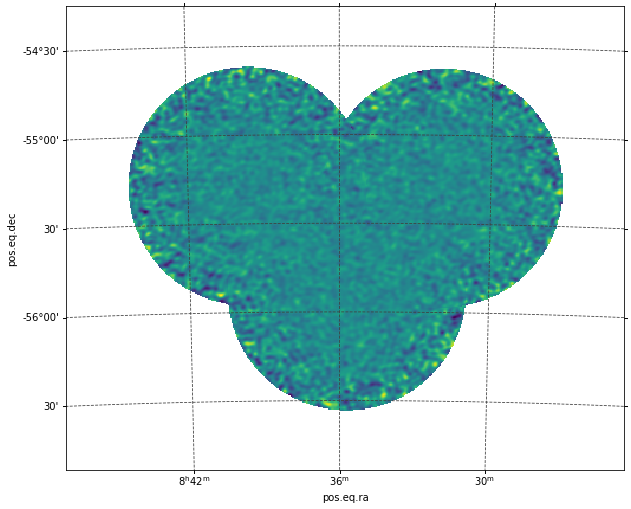

In [3]:
# wcs projection:
wcs1 = WCS(hdu1[0].header,naxis=2) # wcs plots in x/y. Wcs is a 'translater' between ra/dec and x/y
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection=wcs1)
ax.imshow(reduced1)
plt.grid(color='0.25', ls='--')

Python plots the array in x/y, then wcs changes the *axes* to RA/Dec, using information from the header.
If you try to plot RA/Dec coords, it will be interpretted as x/y coords and will be plotted incorrectly. You must first convert your RA/Dec coords to x/y using **world_to_pixel_values()** 

# Read in the RA/Dec data you want to overlay

In [4]:
# The three centre-points of the Mosaic (this format is H:M:S)
RA_h_c, RA_m_c, RA_s_c, Dec_d_c, Dec_m_c, Dec_s_c = np.loadtxt('/Users/nadia/data/mosaic1_centre_points.txt'\
                                                               , unpack=True, usecols=(0,1,2,3,4,5))
ra_c = (RA_h_c + RA_m_c/60 + RA_s_c/(60*60)) * (360/24)
dec_c = (Dec_d_c - Dec_m_c/60 - Dec_s_c/(60*60))

# Convert the RA/Dec data to x/y

In [5]:
# Use Astropy to convert the centre-points from ra/dec coords to x/y coords
x_centre, y_centre = wcs1.world_to_pixel_values(ra_c,dec_c)

# Plot FITS image with my data points overlayed

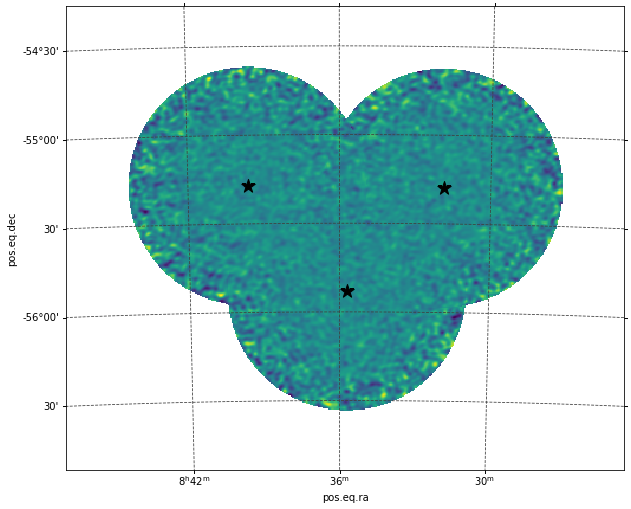

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection=wcs1)
ax.imshow(reduced1)
ax.scatter(x_centre,y_centre,marker='*',c='k',s=200)
plt.grid(color='0.25',ls='--')

# The other way around (x/y to RA/Dec)
***
You can also convert from x/y to RA/Dec using **pixel_to_world_values()**. This is simple if you have arrays that explicitly have x and y values. But in this case, the data (reduced1) is a map of intensities. In other words, pixel_to_world_values works well if you can plt.scatter your data (not plt.imshow). But for the sake of demonstration, let's extract the points around the edge of the mosaic into an array of x values and an array of y values.

In [75]:
# Identifying the outer pixels of mosaic1 (just ignore this part)

x_out = [] # defining empty lists
y_out = []
for i in range(1,len(reduced1)-1):
    for j in range(1,len(reduced1[0])-1):
        if reduced1[i][j] > -1000: # if i or j is not a NaN. -1000 is just an arbitrary 'small' number. NaN's will be 'bigger than -1000'
            if (reduced1[i-1][j] > -1000) and (reduced1[i+1][j] > -1000) and (reduced1[i][j-1]>-1000) and (reduced1[i][j+1]>-1000):
                val=True # these are cases where the pixels left, right, up and down from the current pixel are all real numbers.
            else:
                y_out.append(i) # filling the lists with the pixels around the edge of the mosaic
                x_out.append(j)

Now you can convert the x/y arrays to ra/dec arrays and make a scatter plot

Text(0, 0.5, 'Dec [Deg]')

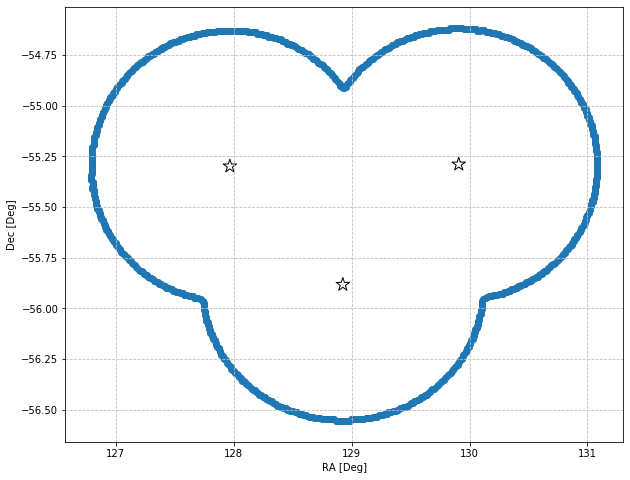

In [76]:
ra_out,dec_out = wcs1.pixel_to_world_values(x_out,y_out)
fig = plt.figure(figsize=(10,8))
plt.scatter(ra_out,dec_out)
plt.scatter(ra_c,dec_c,marker='*',edgecolor='k',facecolor='None',s=200) # add the centre-points in ra/dec
plt.grid(color='0.75',ls='--')
# Axes labels:
plt.xlabel("RA [Deg]")
plt.ylabel("Dec [Deg]")

The points and outline have been converted from x/y coords to ra/dec. Keep in mind, while the conversion is correct, the axes have not undergone a projection correction, i.e. the grid lines are parallel (*compare this to the first image*).

# Or you can plot everything in x/y coordinates

Text(0, 0.5, 'Y channel')

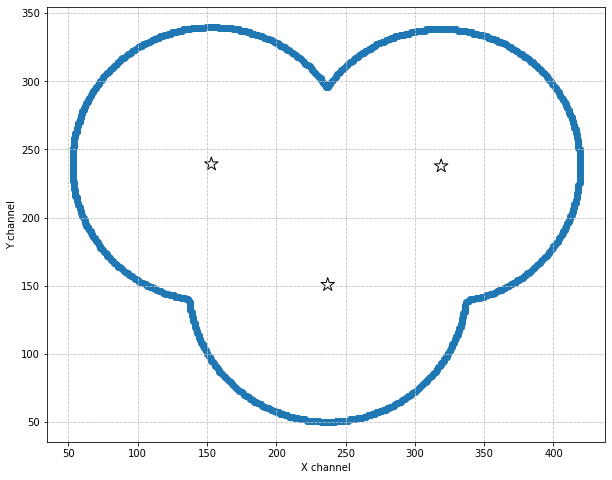

In [59]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x_out,y_out)
plt.scatter(x_centre,y_centre,marker='*',edgecolor='k',facecolor='None',s=200) # add the centre-points in x/y
plt.grid(color='0.75', ls='--')
# Axes labels:
plt.xlabel("X channel")
plt.ylabel("Y channel")